In [1]:
import pandas as pd
import numpy as np
import ffn
from datetime import datetime as dt
from datetime import timedelta
import seaborn as sns
import matplotlib as mpl
import matplotlib.dates as mdates
from matplotlib import font_manager
from IPython.display import FileLink, FileLinks

In [2]:
mpl.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

Fontconfig warning: line 146: blank doesn't take any effect anymore. please remove it from your fonts.conf


['/System/Library/Fonts/Supplemental/NotoSansTaiViet-Regular.ttf',
 '/System/Library/Fonts/Supplemental/STIXSizTwoSymBol.otf',
 '/Users/jmp/Library/Fonts/RobotoCondensed-Bold.ttf',
 '/System/Library/Fonts/Supplemental/Myanmar MN.ttc',
 '/System/Library/Fonts/Supplemental/NotoSansTagalog-Regular.ttf',
 '/Library/Fonts/Beverly-Regular.ttf',
 '/System/Library/Fonts/SFArmenianRounded.ttf',
 '/Library/Fonts/sileighty-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Bangla MN.ttc',
 '/System/Library/Fonts/Supplemental/STIXSizTwoSymReg.otf',
 '/Library/Fonts/Microsoft/MingLiU.ttf',
 '/System/Library/Fonts/Supplemental/NotoSansCuneiform-Regular.ttf',
 '/System/Library/Fonts/Supplemental/Arial.ttf',
 '/Library/Fonts/MyriadPro-BoldCond.otf',
 '/System/Library/Fonts/Supplemental/NotoSansLisu-Regular.ttf',
 '/Library/Fonts/HeyBaby-Regular.ttf',
 '/Library/Fonts/summertime-Swirls3.ttf',
 '/Library/Fonts/CharlemagneStd-Bold.otf',
 '/System/Library/Fonts/SFArmenian.ttf',
 '/Library/Fonts/PrestigeEl

In [3]:
font_manager.findfont('Roboto Condensed')
font_manager.findfont('Roboto')

'/Users/jmp/Library/Fonts/Roboto-Regular.ttf'

In [4]:
%matplotlib inline
pd.options.display.float_format = '{:,.4f}'.format
sns.set_style("whitegrid")

mpl.rcParams.update({
                     'text.color' : "white",
                     'lines.linewidth': 4,
                     'font.size': 16.0,
                     'legend.facecolor': "182742",
                     'legend.edgecolor': 'CFB023',
                     'legend.fancybox': True,
                     'legend.framealpha': 1.,
                     'legend.loc': 'right',
                     'xtick.color': 'white',
                     'ytick.color': 'white',
                     'ytick.minor.visible': True,
                     'axes.facecolor': '#182742',
                     'axes.edgecolor': 'white',
                     'axes.grid': False,
                     'axes.axisbelow': 'line',
                     'grid.alpha': 0.3,
#                      'axes.grid.axis': 'y',
#                      'axes.grid.which': 'minor',
                     'axes.labelcolor' : "white",
                     'axes.labelsize': "24",
                     'axes.labelweight': "bold",
                     'axes.titlesize': 28,
                     'axes.titleweight': 'bold',
                     'axes.titlepad': 20,
                     'figure.facecolor': '#182742',
#                      'xtick.bottom': False,
                     'figure.figsize': [16, 9],
                     'font.sans-serif': ['Roboto Condensed', 'Roboto', 'Tahoma', 'DejaVu Sans', 'Lucida Grande', 'Verdana'],
                     'font.family': "sans-serif",
                    }
                   )
mpl.rcParams

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'white',
          'axes.facecolor': '#182742',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both',
          'axes.grid.which

In [5]:
BITCOIN_PRICE_DATAFILE = 'bitcoin-price-usd - April 2024 - bitcoin-price-usd.csv'
MVRV_Z_SCORE_DATAFILE = 'bitcoin-mvrv-z-score - May 2023.csv'

In [6]:
FOA_START_DATE = dt.fromisoformat('2019-11-19').date()
FOA_END_DATE = dt.fromisoformat('2022-04-30').date()
FUND_START_DATE = dt.fromisoformat('2022-05-01').date()
FUND_END_DATE = dt.fromisoformat('2024-04-30').date()

# Load Bitcoin Price Data

In [7]:
bitcoin_df = pd.read_csv(BITCOIN_PRICE_DATAFILE)
bitcoin_df.timestamp = pd.to_datetime(bitcoin_df.timestamp)
bitcoin_df = bitcoin_df.set_index(bitcoin_df.timestamp)
bitcoin_df

,timestamp,Bitcoin
timestamp,,
2010-07-17,2010-07-17,0.0500
2010-07-18,2010-07-18,0.0900
2010-07-19,2010-07-19,0.0800
2010-07-20,2010-07-20,0.0700
2010-07-21,2010-07-21,0.0800
...,...,...
2024-03-27,2024-03-27,"69,469.9900"
2024-03-28,2024-03-28,"70,780.6000"
2024-03-29,2024-03-29,"69,850.5400"


# 200 Week SMA Chart

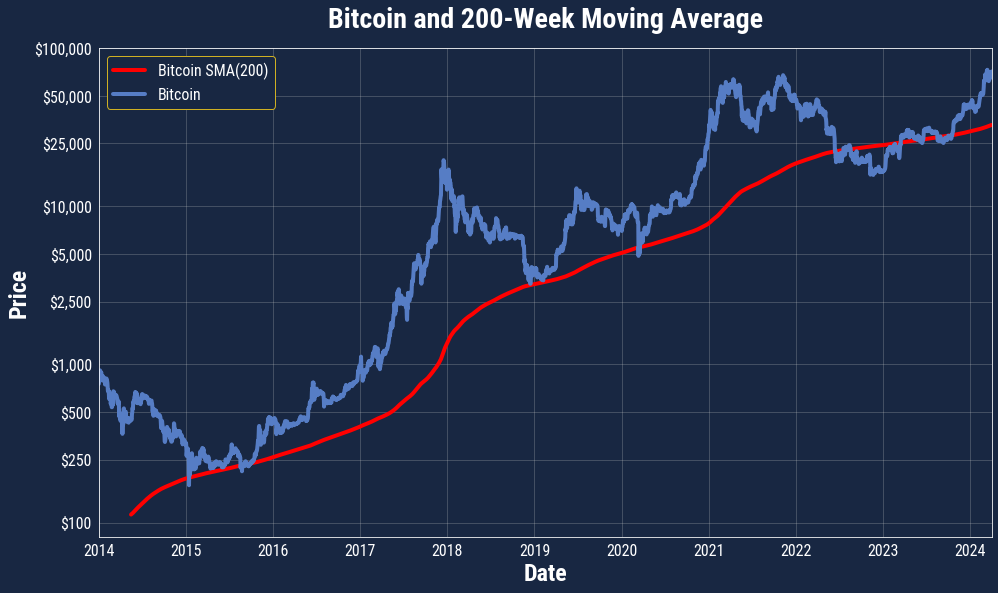

In [8]:
sample_start = FOA_START_DATE - timedelta(days=1400)
sample = bitcoin_df['2014-01-01':].copy()
sample['Bitcoin SMA(200)'] = bitcoin_df[['Bitcoin']].rolling(1400).mean()
ax = sample[['Bitcoin SMA(200)', 'Bitcoin']].plot.line(title='Bitcoin and 200-Week Moving Average', logy=True, color={'Bitcoin SMA(200)': 'red', 'Bitcoin': '#567DC5'}, xlabel="Date", ylabel="Price")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(subs=[2.5, 5, 10]))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(True)

ax.get_figure().savefig('graph-btc-sma-200.pdf', format='pdf')
sample[['Bitcoin SMA(200)', 'Bitcoin']].to_csv('bitcoin-weeky-sma-200.csv')

# Halving Chart

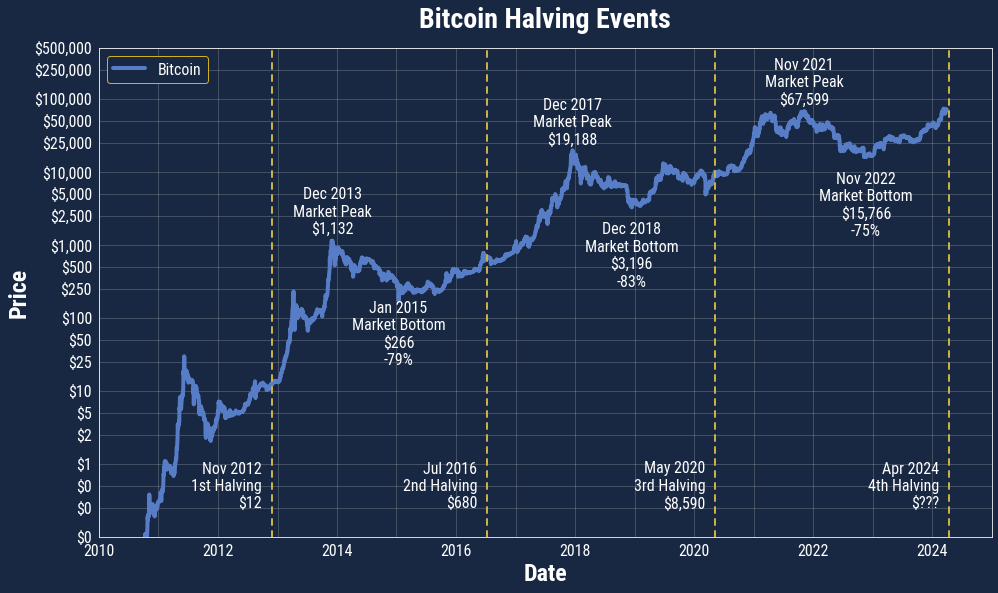

In [9]:
ax = bitcoin_df[['Bitcoin']].plot(title='Bitcoin Halving Events', logy=True, color={'Bitcoin': '#567DC5'}, xlabel="Date", ylabel="Price")
ax.set_ylim([.1, 500000])
ax.set_xlim(['2010-01-01', '2025-01-01'])

ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(subs=[2.5, 5, 10]))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)


halving_events = [
    {
        'date': dt(2012, 11, 28),
        'price': 12.5,
        'name': '1st Halving',
    },
    {
        'date': dt(2016, 7, 9),
        'price': 680,
        'name': '2nd Halving',
    },
    {
        'date': dt(2020, 5, 11),
        'price': 8590,
        'name': '3rd Halving',
    },
    {
        'date': dt(2024, 4, 15),
        'price': 100000,
        'name': '4th Halving',
        'price_override': '???',
    },
]

for he in halving_events:
    datestr = he['date'].strftime("%b %Y")
    halving_name = he['name']
    if 'price_override' in he:
        halving_price_str = he['price_override']
    else:
        halving_price_str = '{:,.0f}'.format(he['price'])
    ax.axvline(he['date'], color='#CAB145', dashes=(3, 3), linewidth=2, dash_capstyle="round")
    ax.text(he['date'] - timedelta(days=60), .25, f'{datestr}\n{halving_name}\n${halving_price_str}', color='#ffffff', horizontalalignment='right')
    

market_tops = [
    {
        'date': dt(2013, 12, 4),
        'price': 1132,
    },
    {
        'date': dt(2017, 12, 16),
        'price': 19188,
    },
    {
        'date': dt(2021, 11, 8),
        'price': 67599,
    },
]
    
for mt in market_tops:
    datestr = mt['date'].strftime("%b %Y")
    if 'price_override' in mt:
        price_str = mt['price_override']
    else:
        price_str = '{:,.0f}'.format(mt['price'])
    ax.text(mt['date'], mt['price'] * 1.25, f'{datestr}\nMarket Peak\n${price_str}', color='#ffffff', horizontalalignment='center')
    
market_bottoms = [
    {
        'date': dt(2015, 1, 13),
        'price': 266,
        'drawdown': -.79,
    },
    {
        'date': dt(2018, 12, 14),
        'price': 3196,
        'drawdown': -.83,
    },
    {
        'date': dt(2022, 11, 21),
        'price': 15766,
        'drawdown': -0.75,
    },
]

for mb in market_bottoms:
    datestr = mb['date'].strftime("%b %Y")
    drawdown_str = '{:.0f}%'.format(mb['drawdown'] * 100.)
    if 'price_override' in mb:
        price_str = mb['price_override']
    else:
        price_str = '{:,.0f}'.format(mb['price'])
    ax.text(mb['date'], mb['price'] * .65, f'{datestr}\nMarket Bottom\n${price_str}\n{drawdown_str}', color='#ffffff', horizontalalignment='center', verticalalignment='top')

    
ax.get_figure().savefig('bitcoin_halving_chart.pdf', format='pdf')


# Load MVRV Price Data (glassnode.com)

In [10]:
tempdf = pd.read_csv(MVRV_Z_SCORE_DATAFILE)
tempdf.timestamp = pd.to_datetime(tempdf.timestamp)
tempdf.rename(columns={'value': 'MVRV Z-Score'}, inplace=True)
tempdf['Date'] = tempdf.timestamp.dt.date
tempdf.index = tempdf.timestamp.dt.date
tempdf.dtypes

timestamp       datetime64[ns, UTC]
MVRV Z-Score                float64
Date                         object
dtype: object

In [11]:
merged_df = pd.merge(df, tempdf, how='inner', on='Date')
merged_df

NameError: name 'df' is not defined

In [ ]:
df = merged_df[['Date', 'Bitcoin', 'MVRV Z-Score']]
df.index = df.Date
df

In [ ]:
ax = df[['Bitcoin']].plot(title='Bitcoin Price', logy=True, color={'Bitcoin': '#567DC5'}, xlabel="Date", ylabel="Price")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(subs=[2.5, 5, 10]))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.grid(True)


ax.get_figure().savefig('bitcoin_price.pdf', format='pdf')


# MVRV Z-Score Index

In [ ]:
sample_start = FOA_START_DATE 
sample = bitcoin_df[:FUND_END_DATE].copy()
# sample['Bitcoin SMA(200)'] = df[['Bitcoin']].rolling(1400).mean()
ax = sample[['MVRV Z-Score', 'Bitcoin']].plot.line(title='Bitcoin vs MVRV Z-Score', logy=True, color={'MVRV Z-Score': 'red', 'Bitcoin': '#567DC5'}, xlabel="Date", ylabel="Price")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x):,.0f}")
# ax.yaxis.set_minor_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_major_formatter(lambda x, pos: f"${int(x)}")
ax.yaxis.set_major_locator(mpl.ticker.LogLocator(subs=[2.5, 5, 10]))
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.grid(True)
ax.get_figure().savefig('graph-mvrv-z-score.pdf', format='pdf')
sample[['MVRV Z-Score', 'Bitcoin']].to_csv('mvrv-z-score.csv')

In [ ]:
sample